# Introduction
## " Understanding Classification Model Performance Metrics "

Our group consists of four members, and this is a collaborative project. The members are:

- Mahesh Rajendra
- Bhavitha Bojja
- Mamatha Singh
- Nandini Srirapu


## Data Summary

The dataset has 180 observations and 11 columns in which only three attributes are used for analysis:
1) **class**: the actual classification for the observation  

2) **scored.class**: the predicted classification for the observation (can only be ‘0’ or ‘1’; identified by comparing the classification model’s probability score (i.e., the likelihood that the correct classification for an observation is a ‘1’) for the observation against a 0.50 threshold)

3) **scored.probability**: the classification model’s probability score (i.e., the likelihood that the correct classification for an observation is a ‘1’) for the observation


## Plan/Methodology

1. **Data Acquisition** : The data in CSV format is retrieved from GitHub.

2. **Data Wrangling** : Ensuring dataset has no null or missing values.

3. **Calculation of Metrics without pre-built methods** : Python code functions that calculates a suite of classification model performance metrics.

4. **Calculation of Metrics using pre-built methods** : Using  pre-built Python functions that automatically calculate those same metrics and comparing the results with previous methods(python code functions).

## Data Acquisition

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_url = 'https://raw.githubusercontent.com/Bhavitha-Bojja/DAV-6150/refs/heads/main/M5_Data.csv'
df = pd.read_csv(data_url)

# shape of the data
df.shape

(181, 11)

In [3]:
# first 5 rows of the data
df.head()


,pregnant,glucose,diastolic,skinfold,insulin,bmi,pedigree,age,class,scored.class,scored.probability
0,7,124,70,33,215,25.5,0.161,37,0,0,0.328452
1,2,122,76,27,200,35.9,0.483,26,0,0,0.273190
2,3,107,62,13,48,22.9,0.678,23,1,0,0.109660
3,1,91,64,24,0,29.2,0.192,21,0,0,0.055998
4,4,83,86,19,0,29.3,0.317,34,0,0,0.100491


## Data Wrangling

In [4]:
# Checking for missing values
df.isnull().sum()

,0
pregnant,0
glucose,0
diastolic,0
skinfold,0
insulin,0
bmi,0
pedigree,0
age,0
class,0
scored.class,0


In [5]:
# sanity check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   pregnant            181 non-null    int64  
 1   glucose             181 non-null    int64  
 2   diastolic           181 non-null    int64  
 3   skinfold            181 non-null    int64  
 4   insulin             181 non-null    int64  
 5   bmi                 181 non-null    float64
 6   pedigree            181 non-null    float64
 7   age                 181 non-null    int64  
 8   class               181 non-null    int64  
 9   scored.class        181 non-null    int64  
 10  scored.probability  181 non-null    float64
dtypes: float64(3), int64(8)
memory usage: 15.7 KB


In [6]:
# summary statistics
df.describe()

,pregnant,glucose,diastolic,skinfold,insulin,bmi,pedigree,age,class,scored.class,scored.probability
count,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000
mean,3.861878,118.303867,71.701657,19.801105,63.767956,31.577901,0.449641,33.314917,0.314917,0.176796,0.303726
std,3.236551,30.484084,11.802987,15.692326,88.734756,6.659935,0.284006,11.183582,0.465771,0.382554,0.231235
min,0.000000,57.000000,38.000000,0.000000,0.000000,19.400000,0.085000,21.000000,0.000000,0.000000,0.023228
25%,1.000000,99.000000,64.000000,0.000000,0.000000,26.300000,0.257000,24.000000,0.000000,0.000000,0.117024
50%,3.000000,112.000000,70.000000,22.000000,0.000000,31.600000,0.391000,30.000000,0.000000,0.000000,0.239994
75%,6.000000,136.000000,78.000000,32.000000,105.000000,36.000000,0.580000,41.000000,1.000000,0.000000,0.430926
max,15.000000,197.000000,104.000000,54.000000,543.000000,50.000000,2.288000,67.000000,1.000000,1.000000,0.946334


## Calculation of Metrics without pre-built methods

3. Generate the confusion matrix using crosstab()

Predicted    0   1
Actual            
0          119   5
1           30  27


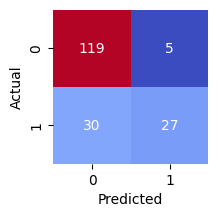

In [7]:
#Confusion Matrix using cross tabulation
confusion_matrix = pd.crosstab(df['class'], df['scored.class'], rownames=['Actual'], colnames=['Predicted'])
print(confusion_matrix)

#Plotting the confusion matrix
plt.figure(figsize=(2,2))
sns.heatmap(confusion_matrix, annot=True, cmap='coolwarm', fmt='d', cbar=False)
plt.show()

- The rows represent the actual classifications.
- The columns represent the predicted classifications.

In [8]:
# Check value counts for 'class' (actual labels)
print("value counts for class column")
print(df['class'].value_counts())

# sum of actual 1's from confusion matrix
actual_1 = confusion_matrix.iloc[1,0] + confusion_matrix.iloc[1,1]
#sum of actual 0's from confusion matrix
actual_0 = confusion_matrix.iloc[0,0] + confusion_matrix.iloc[0,1]


#sum of 1's in dataset
total_1 = df['class'].sum()

print(f"{total_1} 1's in dataset")
print(f"{actual_1} actual 1's in confusion matrix")


# sum of 0's in dataset
total_0 = len(df) - total_1

print(f"{total_0} 0's in dataset")
print(f"{actual_0} actual 0's in confusion matrix")


value counts for class column
class
0    124
1     57
Name: count, dtype: int64
57 1's in dataset
57 actual 1's in confusion matrix
124 0's in dataset
124 actual 0's in confusion matrix


4. Extracting the individual values as:

- True Negatives (TN): 119 (Actual = 0, Predicted = 0)
- False Positives (FP): 5 (Actual = 0, Predicted = 1)
- False Negatives (FN): 30 (Actual = 1, Predicted = 0)
- True Positives (TP): 27 (Actual = 1, Predicted = 1)

In [9]:
# Extract values and save from the confusion matrix
TP = confusion_matrix.loc[1, 1]
FP = confusion_matrix.loc[0, 1]
TN = confusion_matrix.loc[0, 0]
FN = confusion_matrix.loc[1, 0]

# Print extracted values to verify
print(f'True Positive (TP): {TP}')
print('False Positive (FP):',FP)
print(f'True Negative (TN): {TN}')
print(f'False Negative (FN): {FN}')

True Positive (TP): 27
False Positive (FP): 5
True Negative (TN): 119
False Negative (FN): 30


5. Calculate the accuracy for binary classification data without using pre-built functions.

In [10]:
import numpy as np


# Function to calculate accuracy
def calculate_accuracy(actual, predicted):
    """
    Calculate the accuracy for binary classification data.

    actual: A list of actual classifications which is 'Class' here.
    predicted: A list of predicted classifications which is 'Scored.class' here.
    return: Accuracy metric (float).
    """
    actual = np.array(actual)
    predicted = np.array(predicted)

    TP = np.sum((actual == 1) & (predicted == 1))
    TN = np.sum((actual == 0) & (predicted == 0))
    total = len(actual)
    accuracy = (TP + TN) / total
    return accuracy

# Calculate accuracy using the function
accuracy = calculate_accuracy(df['class'], df['scored.class'])
print(f"Accuracy: {accuracy:.2f}")





Accuracy: 0.81


In [11]:
def calculate_precision(actual, predicted):
    """
    Calculate precision for binary classification.

    Parameters:
    actual : The actual classification labels (0 or 1).
    predicted : The predicted classification labels (0 or 1).

    Returns:
    float: The precision score (between 0 and 1).
    """
    actual = np.array(actual)
    predicted = np.array(predicted)
    TP = np.sum((actual == 1) & (predicted == 1))
    FP = np.sum((actual == 0) & (predicted == 1))
    return TP / (TP + FP) if (TP + FP) > 0 else 0

#calling the function and printing precision
print(f"Precision: {calculate_precision(df['class'], df['scored.class']):.2f}")


Precision: 0.84


In [12]:
def calculate_sensitivity(actual, predicted):
    """
    Calculate sensitivity (recall) for binary classification.

    Parameters:
    actual : The actual classification labels (0 or 1).
    predicted : The predicted classification labels (0 or 1).

    Returns:
    float: The sensitivity score (between 0 and 1).
    """
    actual = np.array(actual)
    predicted = np.array(predicted)
    TP = np.sum((actual == 1) & (predicted == 1))
    FN = np.sum((actual == 1) & (predicted == 0))
    return TP / (TP + FN) if (TP + FN) > 0 else 0

# Calling the function and printing the sensitivity
print(f"Sensitivity: {calculate_sensitivity(df['class'], df['scored.class']):.2f}")

Sensitivity: 0.47


In [13]:
def calculate_specificity(actual, predicted):
    """
    Calculate specificity for binary classification.

    Parameters:
    actual : The actual classification labels (0 or 1).
    predicted : The predicted classification labels (0 or 1).

    Returns:
    float: The specificity score (between 0 and 1).
    """
    actual = np.array(actual)
    predicted = np.array(predicted)

    TN = np.sum((actual == 0) & (predicted == 0))
    FP = np.sum((actual == 1) & (predicted == 0))
    return TN / (TN + FP) if (TN + FP) > 0 else 0

# Calling the function and printing the specificity
print(f"Specificity: {calculate_specificity(df['class'], df['scored.class']):.2f}")

Specificity: 0.80


9. Calculate F1 score without using pre-built function

In [14]:
def calculate_f1_score(actual, predicted):
    """
    Function to calculate the F1 Score of binary classification predictions.

    Parameters:
    actual : The actual classifications.
    predicted : The predicted classifications.

    Returns:
    float: The F1 Score of the predictions.
    """

    # Initialize counters
    TP = 0
    FP = 0
    FN = 0

    total_samples = len(actual)

    # Loop through actual and predicted values
    for i in range(total_samples):
        if actual[i] == 1:
            if predicted[i] == 1:
                TP += 1  # Correctly predicted positive
            else:
                FN += 1  # Incorrectly predicted negative
        else:
            if predicted[i] == 1:
                FP += 1  # Incorrectly predicted positive

    # Calculate precision
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0.0

    # Calculate recall (sensitivity)
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0.0

    # Calculate F1 Score
    if precision + recall > 0:
        f1_score = 2 * (precision * recall) / (precision + recall)
    else:
        f1_score = 0.0  # case where precision and recall are both zero

    return f1_score

# Calculate F1 Score using the DataFrame columns
f1_score = calculate_f1_score(df['class'], df['scored.class'])
print(f'F1 Score: {f1_score:.2f}')


F1 Score: 0.61


10. Plot a ROC curve and also calculate AUC without using pre-built funtions.

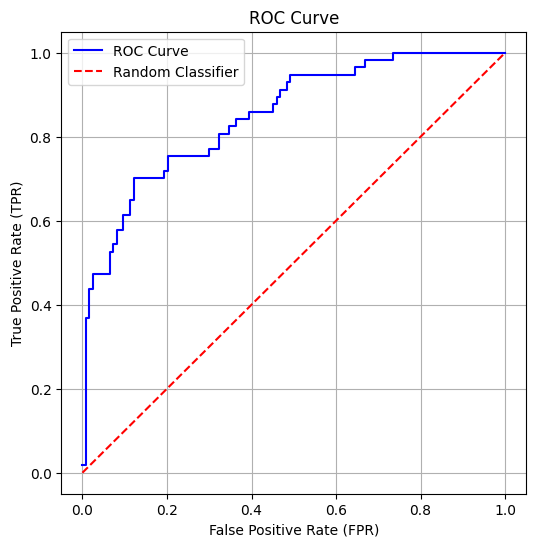

Manually calculated AUC: 0.85


In [15]:
import numpy as np
import matplotlib.pyplot as plt

def plot_roc_and_calculate_auc(true_labels, predicted_probabilities):
    """
    Plot ROC curve and calculate AUC manually.

    Parameters:
    true_labels: A numpy array of true binary class labels (0 or 1)
    predicted_probabilities: A numpy array of predicted probabilities for the positive class (1)

    Returns:
    auc: The manually calculated AUC value
    """
    # Step 1: Sort the predicted probabilities and corresponding true labels
    sorted_indices = np.argsort(predicted_probabilities)[::-1]
    sorted_true_labels = true_labels[sorted_indices]
    sorted_predicted_probabilities = predicted_probabilities[sorted_indices]

    # Step 2: Initialize TPR (True Positive Rate) and FPR (False Positive Rate)
    TPR = []
    FPR = []

    TP = 0
    FP = 0
    TN = np.sum(true_labels == 0)  # Total count of negative samples
    FN = np.sum(true_labels == 1)  # Total count of positive samples

    # Step 3: Compute TPR and FPR for each threshold (unique predicted probability)
    thresholds = sorted_predicted_probabilities
    for i in range(len(sorted_true_labels)):
        if sorted_true_labels[i] == 1:
            TP += 1
            FN -= 1
        else:
            FP += 1
            TN -= 1
        TPR.append(TP / (TP + FN))  # True Positive Rate (Sensitivity/Recall)
        FPR.append(FP / (FP + TN))  # False Positive Rate (1 - Specificity)

    # Convert to numpy arrays for further processing
    TPR = np.array(TPR)
    FPR = np.array(FPR)

    # Step 4: Plot ROC curve
    plt.figure(figsize=(6, 6))
    plt.plot(FPR, TPR, color='blue', label='ROC Curve')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Classifier')  # Diagonal line
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('ROC Curve')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Step 5: Manually calculate AUC using the trapezoidal rule
    auc = 0.0
    for i in range(1, len(TPR)):
        auc += (FPR[i] - FPR[i-1]) * (TPR[i] + TPR[i-1]) / 2

    return auc

# assign required data columns for actual values and predicted probabilities
true_labels = df['class'].values
predicted_probabilities = df['scored.probability'].values

# Call the function to plot ROC and calculate AUC
auc_value = plot_roc_and_calculate_auc(true_labels, predicted_probabilities)
print(f"Manually calculated AUC: {auc_value:.2f}")


11. Applying the Python functions to the relevant columns of the provided data set to produce the classification metrics specified in steps 5 through 9 of this assignment

In [16]:
# call the functions
acc = calculate_accuracy(df['class'], df['scored.class'])
sens = calculate_sensitivity(df['class'], df['scored.class'])
prec = calculate_precision(df['class'], df['scored.class'])
spec = calculate_specificity(df['class'], df['scored.class'])
f1 = calculate_f1_score(df['class'], df['scored.class'])

# Print the results
print("Calculated Metrics:")
print(f"Accuracy: {acc:.2f}")
print(f"Sensitivity: {sens:.2f}")
print(f"Precision: {prec:.2f}")
print(f"Specificity: {spec:.2f}")
print(f"F1 Score: {f1:.2f}")

Calculated Metrics:
Accuracy: 0.81
Sensitivity: 0.47
Precision: 0.84
Specificity: 0.80
F1 Score: 0.61


## Calculation of Metrics using pre-built methods

12. Comparing the output of functions against the output of the pre-built functions available within the scikit-learn library.

Confusion Matrix:
[[119   5]
 [ 30  27]]


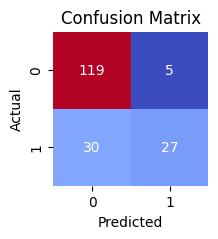

In [17]:
# Import the confusion_matrix function from sklearn
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
sk_ck = confusion_matrix(df['class'], df['scored.class'], labels=[0, 1])
print("Confusion Matrix:")
print(sk_ck)

#Plotting the confusion matrix
plt.figure(figsize=(2,2))
sns.heatmap(sk_ck, annot=True, cmap='coolwarm', fmt='d', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

- Both confusion matrices displayed the same information; however, the crosstab returned as a pandas dataframe while the sklearn confusion matrix returned values in a nested list.

In [18]:
# import required libraries
from sklearn import metrics

# calculate accuracy
accuracy = metrics.accuracy_score(df['class'], df['scored.class'])

# calculate precision
precision = metrics.precision_score(df['class'], df['scored.class'])

# calculate recall
recall = metrics.recall_score(df['class'], df['scored.class'])

# calculate F1 score
f1_score = metrics.f1_score(df['class'], df['scored.class'])

# print all the metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Precision: {precision:.2f}")
print(f"F1 Score: {f1_score:.2f}")

# show classification report
classification_report = metrics.classification_report(df['class'], df['scored.class'])

print("Classification Report:")
print(classification_report)





Accuracy: 0.81
Recall: 0.47
Precision: 0.84
F1 Score: 0.61
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.96      0.87       124
           1       0.84      0.47      0.61        57

    accuracy                           0.81       181
   macro avg       0.82      0.72      0.74       181
weighted avg       0.81      0.81      0.79       181



- Same outcomes were obtained using both  calculation methods. For multi-class datasets, the sklearn classification approach allows us to examine greater detail statistics for each class and other metrics like macro avg and weighted avg, which can be bit complex to calculate manually.

13. Generate a ROC plot and Calculating AUC using sklearn.metrics.

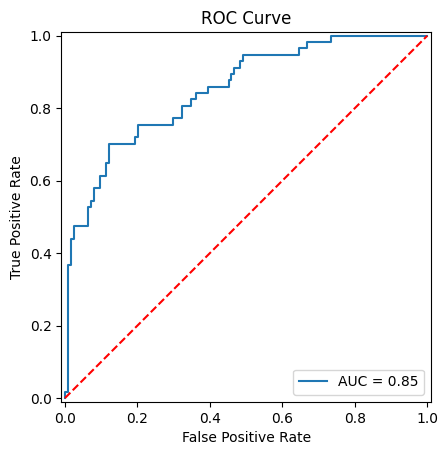

Scikit-learn calculated AUC: 0.85


In [19]:
# Importing necessary libraries and modules
from sklearn.metrics import RocCurveDisplay, roc_curve, auc
# Calculating ROC curve using scikit-learn
fpr, tpr, _ = roc_curve(df['class'], df['scored.probability'])

# Calculating AUC using scikit-learn
roc_auc = auc(fpr, tpr)

# Plotting ROC curve using RocCurveDisplay
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,)
roc_display.plot()
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Classifier')  # Diagonal line
plt.title('ROC Curve')
plt.show()
# Printing the AUC value
print(f"Scikit-learn calculated AUC: {roc_auc:.2f}")


- From both methods we got the similar curve and only difference is the ROC curve generated by sklearn provides an AUC value that is labeled inside the graph by default, where as by generic python code we may have to develop it separate.